# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading Dataset

In [4]:
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
df = pd.read_csv(url)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Heatmap

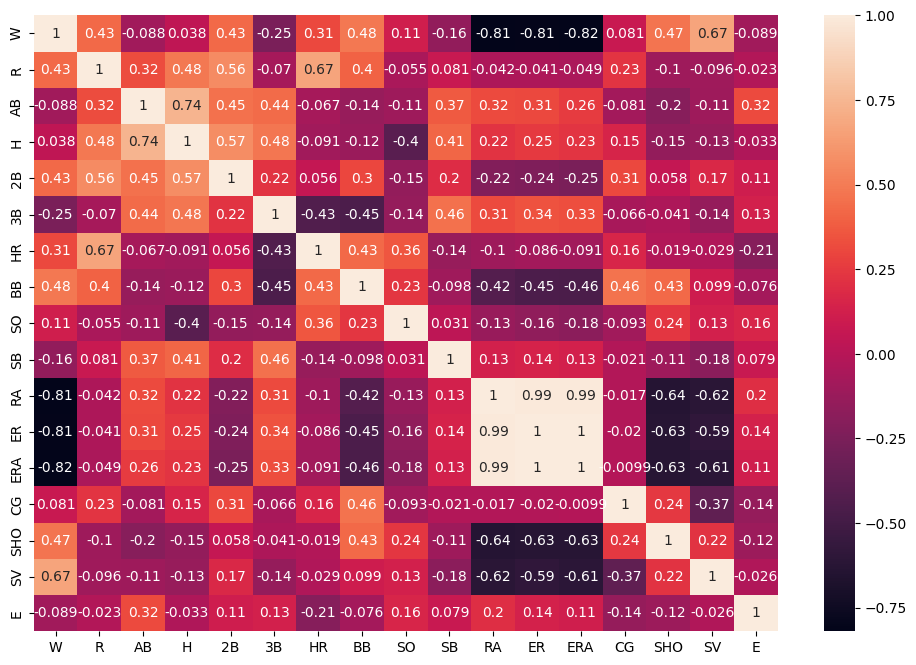

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Model

In [21]:
X = df.drop('W', axis=1)
y = df['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 27.943032506666928


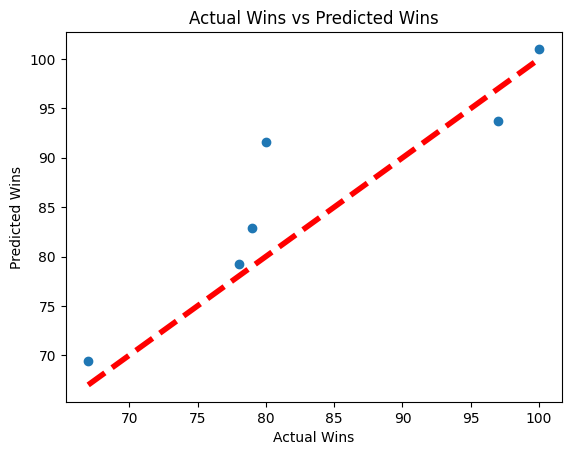

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs Predicted Wins')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.show()

# Prediction

In [33]:
def predict_wins(model):
    print("Enter the following team statistics for prediction:") 
    R = int(input("Runs (R): "))
    AB = int(input("At Bats (AB): "))
    H = int(input("Hits (H): "))
    DB = int(input("Doubles (2B): "))
    TB = int(input("Triples (3B): "))
    HR = int(input("Home Runs (HR): "))
    BB = int(input("Walks (BB): "))
    SO = int(input("Strikeouts (SO): "))
    SB = int(input("Stolen Bases (SB): "))
    RA = int(input("Runs Allowed (RA): "))
    ER = int(input("Earned Runs (ER): "))
    ERA = float(input("Earned Run Average (ERA): "))
    CG = int(input("Complete Games (CG): "))
    SHO = int(input("Shutouts (SHO): "))
    SV = int(input("Saves (SV): "))
    E = int(input("Errors (E): "))
    input_data = np.array([[R, AB, H, DB, TB, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]]) 
    predicted_wins = model.predict(input_data)
    print(f"\nPredicted number of wins: {predicted_wins[0]:.2f}")
predict_wins(model)

Enter the following team statistics for prediction:


Runs (R):  724
At Bats (AB):  5575
Hits (H):  1497
Doubles (2B):  300
Triples (3B):  42
Home Runs (HR):  139
Walks (BB):  383
Strikeouts (SO):  973
Stolen Bases (SB):  104
Runs Allowed (RA):  641
Earned Runs (ER):  601
Earned Run Average (ERA):  3.73
Complete Games (CG):  2
Shutouts (SHO):  8
Saves (SV):  56
Errors (E):  88



Predicted number of wins: 96.32


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
